<a href="https://colab.research.google.com/github/Haykalilys/tugas_DesainAnalisisAlgoritma/blob/master/Tugas_6%20%26%20huffman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# first two terms
nterms = int(input("How many terms?"))
n1, n2 = 0, 1
count = 0

# check if the number oe terms is valid
if nterms <= 0:
  print("please enter a positive integer")
elif nterms == 1:
  print("Fibobancci sequence upto",nterms,":")
  print(n1)
else:
  print("Fibonacci sequence:")
  while count < nterms:
    print(n1)
    nth = n1 + n2
    # update values
    n1 = n2
    n2 = nth
    count +=1

How many terms?15
Fibonacci sequence:
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377


In [43]:
# fibonacci dengan rekursi

def recur_fibo(n):
  if n <= 1:
    return n
  else:
    return(recur_fibo(n-1) + recur_fibo(n-2))
nterms = 20

# cek apakah nilai nterms valid
if nterms <= 0:
  print("Please enter a positive integer")
else:
  print("Fibonacci sequense:")
  for i in range(nterms):
    print(recur_fibo(i))

Fibonacci sequense:
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


In [44]:
# Latihan
# fibonacci dengan rekursi

def recur_fibo(n):
  if n <= 1:
    return n
  else:
    return(recur_fibo(n-1) + recur_fibo(n-2))
nterms = 30

# cek apakah nilai nterms valid
if nterms <= 0:
  print("Please enter a positive integer")
else:
  print("Fibonacci sequense:")
  for i in range(nterms):
    print(recur_fibo(i))

Fibonacci sequense:
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229


In [45]:
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import itertools

In [46]:
# try all tours (exact_TSP)
def exact_TSP(cities):
  "General all possible tours of the cities and choose the Shortets one."
  return shortest(alltours(cities))

def shortest(tours):
  "Return the tour with the minimum total distance."
  return min(tours, key=total_distance)

In [47]:
# representing Tours
alltours = itertools.permutations #the permutation function is already defined in the itertools module

cities = {1,2,3}

list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [48]:
# representing cities and distance
def total_distance(tour):
  "The total distance between each pair of consecutive cities in the tour"
  return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))

In [49]:
City = complex #constructor dot new cities, e.g. City(300, 400)

def distance(A, B):
    "The distance between two points."
    return abs(A - B)

In [50]:
A = City(300, 0)
B = City(0, 400)
distance(A, B)


500.0

In [51]:
def Cities(n):
  "Make set of n cities, eacah with random coordinates."
  return set(City(random.randrange(10, 890), random.randrange(10, 590)) for c in range(n))

# lets make sime standard sets of cities of various sizes.
# we'll set the random seed so that these sets are the same every time we run this notebook.
random.seed('seed')
cities8, cities10, cities100, cities1000 = Cities(8), Cities(10), Cities(100), Cities(1000)
cities8

{(151+70j),
 (252+365j),
 (303+506j),
 (498+96j),
 (54+361j),
 (551+542j),
 (684+435j),
 (800+430j)}

In [52]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))



((551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j))
1990.388372313552


In [53]:
# Try All Non-redundant Tours
def alltours(cities):
  "Return a list of tours, each a permutatiton of cities, but each one starting with the same city."
  start = first(cities)
  return[[start]+list(tour)
    for tour in itertools.permutations(cities - {start})]

def first(collection):
  "Start iterating over collection, and return the first element."
  for x in collection: return x

In [54]:
alltours({1,2,3})

[[1, 2, 3], [1, 3, 2]]

In [55]:
alltours({1,2,3,4})

[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 4, 2],
 [1, 4, 2, 3],
 [1, 4, 3, 2]]

In [56]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))


[(551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j)]
1990.388372313552


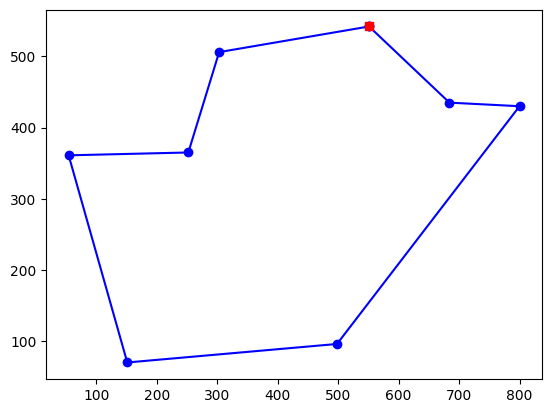

8 city tour; total distance = 1990.4; time = 0.016 secs for exact_TSP


In [57]:
# Plotting
import time
def plot_tour(algorithm, cities):
  "Apply a TSP algorithm to cities, and plot the resulting tour."
  # fint the solution and time how long it takes
  t0 = time.time()
  tour = algorithm(cities)
  t1 = time.time()
  # Plot the tour as blue lines between blue circles, and the starting city as a red square
  plotline(list(tour)+[tour[0]])
  plotline([tour[0]], ' rs')
  plt.show()
  print("{} city tour; total distance = {:.1f}; time = {:.3f} secs for {}". format(len(tour), total_distance(tour), t1-t0, algorithm.__name__))

def plotline(points, style='bo-'):
  "Plot a list of pooints (complex number) in the 2-D plane."
  X, Y = XY(points)
  plt.plot(X, Y, style)

def XY(points):
  "Given a list points, return two lists: X cordinatinates, and Y coordinates."
  return [p.real for p in points], [p.imag for p in points]

plot_tour(exact_TSP, cities8)

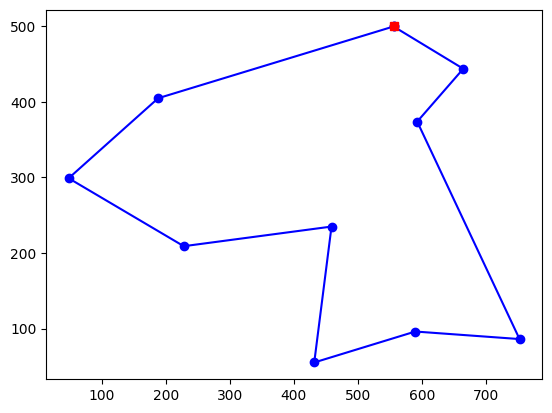

10 city tour; total distance = 2050.3; time = 2.643 secs for exact_TSP


In [58]:
plot_tour(exact_TSP, cities10)

In [59]:
# greedy nearest neighbor (greedy _TSP)

def greedy_TSP(cities):
  "At each step, visit nearest neighbor that is still invisited"
  start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

def nearest_neighbor(A, cities):
  "Find the city in cities that is nearest to city A."
  return min(cities, key=lambda x: distance(x, A))

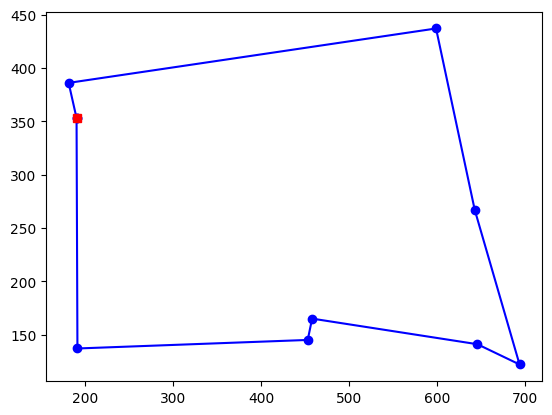

9 city tour; total distance = 1524.5; time = 0.310 secs for exact_TSP


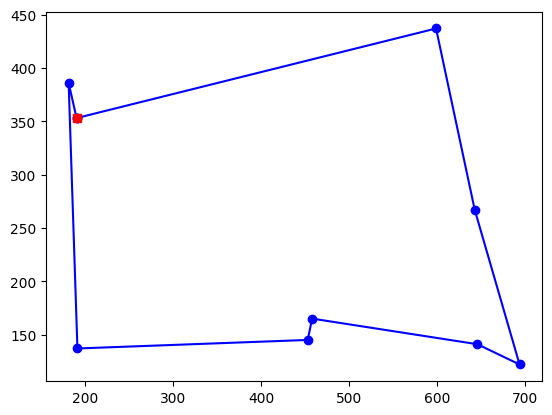

9 city tour; total distance = 1554.1; time = 0.000 secs for greedy_TSP


In [60]:
cities = Cities(9)
plot_tour(exact_TSP, cities)
plot_tour(greedy_TSP, cities)

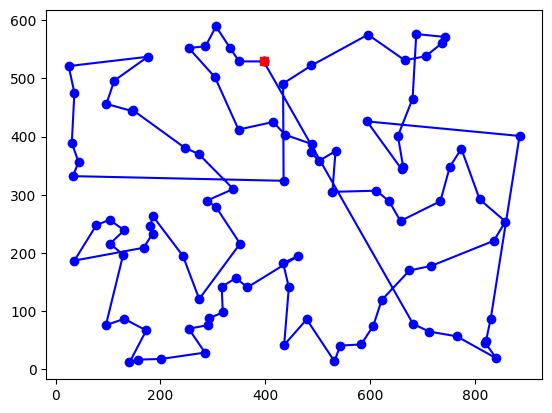

100 city tour; total distance = 6987.7; time = 0.003 secs for greedy_TSP


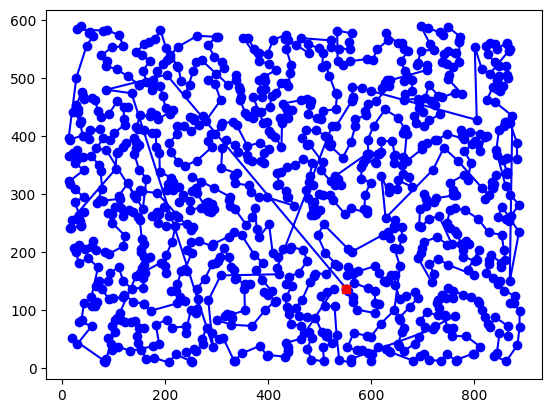

1000 city tour; total distance = 20529.4; time = 0.134 secs for greedy_TSP


In [61]:
plot_tour(greedy_TSP, cities100)
plot_tour(greedy_TSP, cities1000)

In [62]:
# greedy Nearest Neighbor(greedy_TSP)

def greedy_TSP(cities):
  "At each step, visit the nearest neighbor that is still unvisited."
  start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

def nearest_neighbor(A, cities):
  "Find the city in cities that is nearest to city A."
  return min(cities, key=lambda x: distance(x, A))

In [63]:
# Algorithm3 : greedy nearest neighbor from all starting points(all_greedy_TSP)
def all_greedy_TSP(cities):
  "try the greedy algorithm from each of the starting cities: return the shortest tour."
  return shortest(greedy_TSP(cities, start=c)for c in cities)

  # we will modify greedy_TSP to take on optimal start city: otherwise it is unchanged.

def greedy_TSP(circles, start=None):
  "At each step, Visit thee nearest neighbor that is still unvisited."
  if start is None: start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

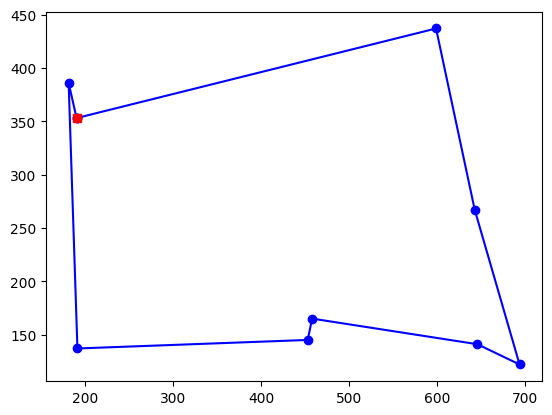

9 city tour; total distance = 1554.1; time = 0.000 secs for greedy_TSP


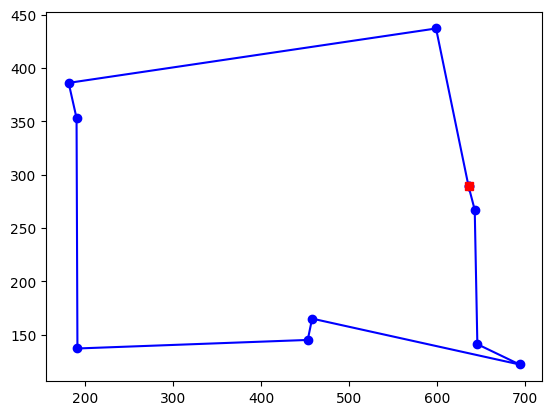

10 city tour; total distance = 1547.2; time = 0.002 secs for all_greedy_TSP


In [64]:
# Compare greedy_TSP to all_greedy_TSP
plot_tour(greedy_TSP, cities100)
plot_tour(all_greedy_TSP, cities100)

In [65]:
# A huffman tree Node
import heapq

class node:
  def __init__(self, freq, symbol, left=None, right=None):
    # frequency of symbol
    self.freq = freq
    # symbol name (character)
    self.symbol = symbol

    # node left of  current node
    self.left = left

    # node right of current node
    self.right = right

    # tree direction (0/1)
    self.huff =''

  def __lt__(self, nxt):
    return self.freq < nxt.freq



In [66]:
# utility funciton to print huffman
# codes for all symbols in the newly
# created huffman tree
def printNodes(node, val=''):

  # huffman code for current node
  newVal = val + str(node.huff)

  # if nide is not an edge node
  # rhen traverse inside it
  if(node.left):
    printNodes(node.left, newVal)
  if(node.right):
    printNodes(node.right, newVal)

    # if node us edge nide then
    # display its huffman code
  if(not node.left and not node.right):
    print(f"{node.symbol} -> {newVal}")


In [67]:
# Characters for huffman tree
chars = ['a', 'b', 'c', 'd', 'e', 'f']

# frequency of characters
freq = [5, 9, 12, 13, 16, 45]

# list containing unused nodes
nodes = []

# converting characters and frequencies
# into huffman tree nodes
for x in range(len(chars)):
  heapq.heappush(nodes, node(freq[x], chars[x]))

In [68]:
while len(nodes) > 1:

  # short all the nodes in ascending order
  # based ontheir frequency
  left = heapq.heappop(nodes)
  right = heapq.heappop(nodes)

  # assign directional value to these nodes
  left.huft = 0
  right.huff = 1

  # combine the 2 smallest nodes to create
  # new node as their parent
  newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)

  heapq.heappush(nodes, newNode)

# Huffman tree is ready!
printNodes(nodes[0])


f -> 
c -> 1
d -> 11
a -> 11
b -> 111
e -> 111
